In [1]:
# import modules
import pandas as pd
import numpy as np

#Visualization tool
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore Warning 
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

In [2]:
# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [3]:
#read the data
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

### Data Wrangling

In [4]:
# shape of test and train and test dataset
print(test.shape, train.shape)

(23856, 142) (9557, 143)


In [5]:
# Let's see some information of train and test data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [7]:
# check for null values
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

### EDA

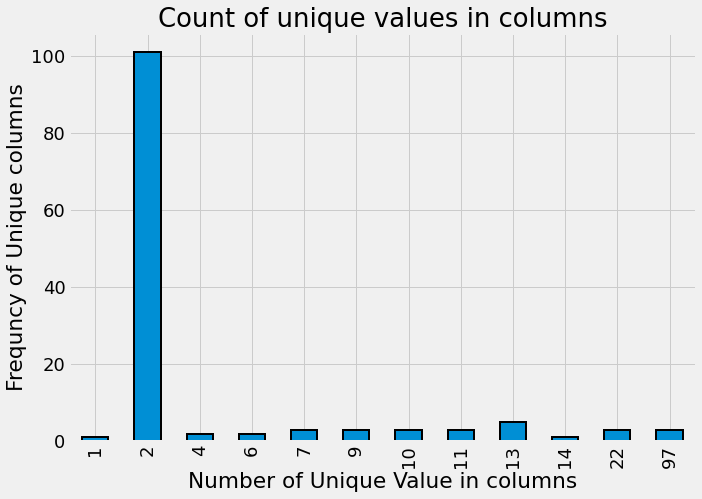

In [8]:
# Count of Unique Values in Integer Columns
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(figsize=(10,7),linewidth=2,edgecolor='k')
plt.xlabel('Number of Unique Value in columns')
plt.ylabel('Frequncy of Unique columns')
plt.title('Count of unique values in columns');

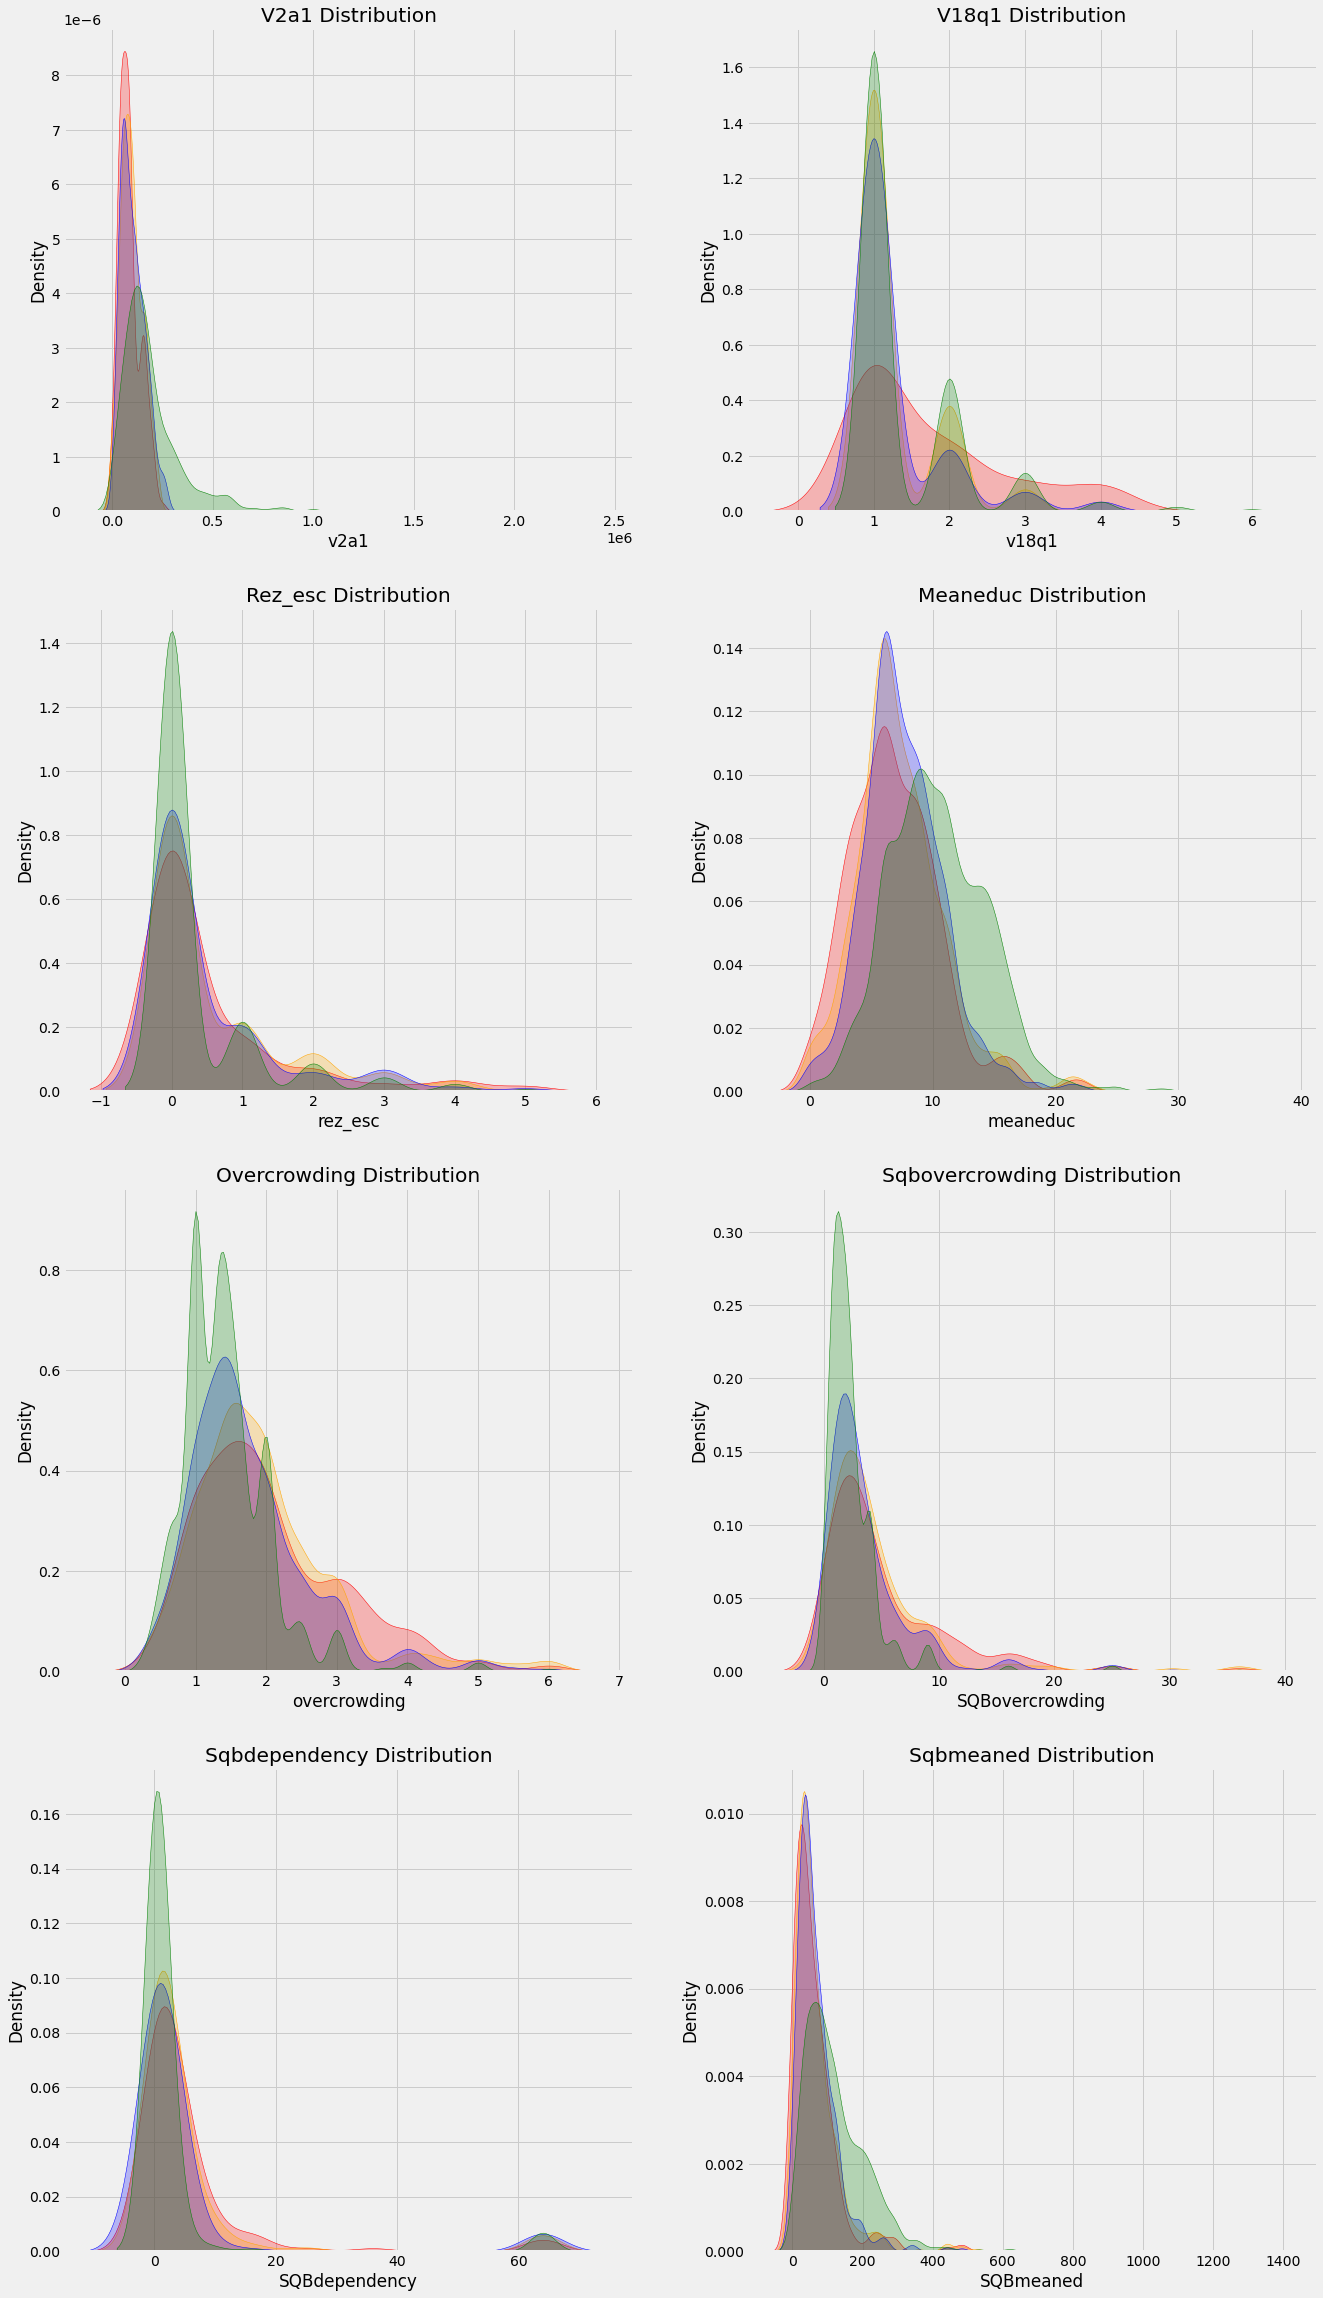

In [9]:
from collections import OrderedDict

plt.figure(figsize=(20,16))
plt.style.use('fivethirtyeight')

# Color mapping
colors=OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for x,col in enumerate(train.select_dtypes(float)):
    ax=plt.subplot(4,2,x+1)
    # iterate through the poverty levels
    for poverty_level, color in colors.items():
         # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level,col].dropna(),ax=ax,color=color,fill=True,label=poverty_mapping[poverty_level])
        plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
        
        
plt.subplots_adjust(top = 2)

In [10]:
# x=train.select_dtypes(float).columns

# plt.style.use('fivethirtyeight')

# for i in x:
#     y=train[i].dropna()
#     plt.figure(figsize=(10,4))
#     sns.kdeplot(x=y,hue=train.Target,color='husl',fill=True)
#     plt.title(f'{i.capitalize()} Distribution'); plt.xlabel(f'{i}'); plt.ylabel('Density')
#     plt.show();
      

### object Columns

In [11]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


- replacing yes and no on above obeject to the 1 and 0

In [12]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for data in [train, test]:
    # Fill in the values with the correct mapping
    data['dependency'] = data['dependency'].replace(mapping).astype(np.float64)
    data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float64)
    data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


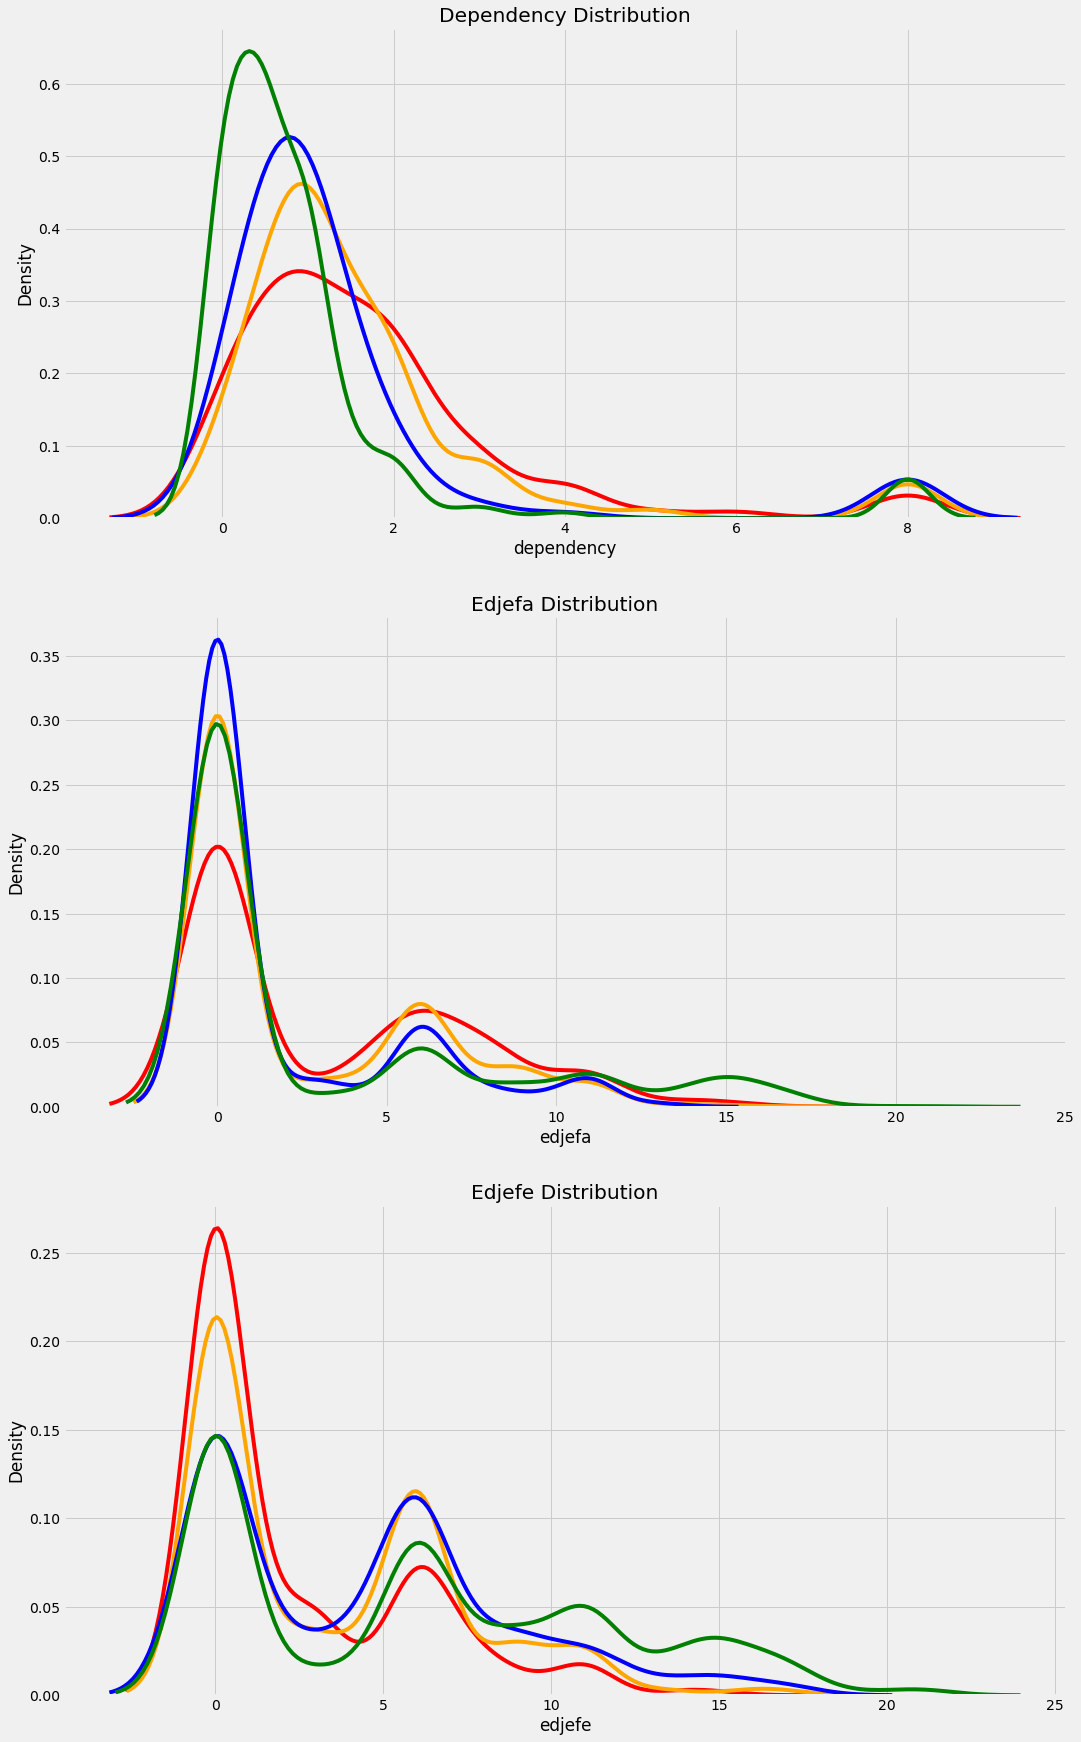

In [13]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
    
plt.subplots_adjust(top = 2)


In [14]:
train.v18q1.unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

In [15]:
train.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    7342
1       0
Name: v18q1, dtype: int64

# Understand the type of data.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(11), int64(129), object(2)
memory usage: 25.8+ MB


# Identify the output variable.

In [18]:
# we have 143 entries in train and 142 in test so by set operator we find the output variable
a=set(train.columns)
b=set(test.columns)

output_variable=a.difference(b)
print(output_variable)

{'Target'}


# Check if there are any biases in your dataset

In [19]:
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split


In [20]:
# separate into inputs and outputs
y=train['Target']
x=train.select_dtypes(np.int64).drop('Target',axis=1)

In [21]:
x.shape

(9557, 129)

In [22]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [24]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 31):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

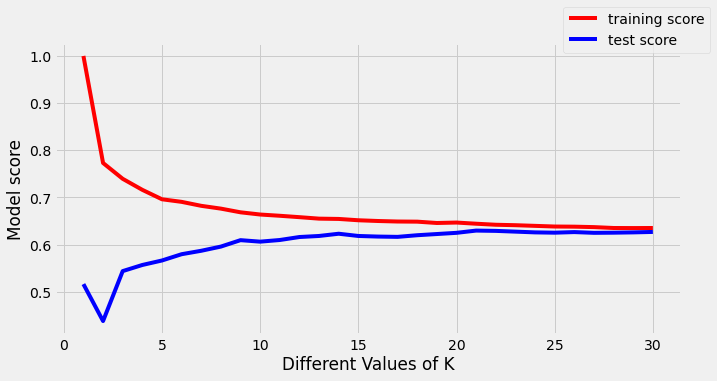

In [25]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors = 14)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)

0.6230183893468612

- Check if there is a house without a family head.

we’ll subset only to the columns where parentesco1 == 1 because this is the head of household, the correct label for each household.

In [27]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


- Check whether all members of the house have the same poverty level.

- Count how many null values are existing in columns.

In [28]:
# Number of missing in each column
missing_val=pd.DataFrame(train.isnull().sum()).rename(columns={0:'Total_Miss_Val'})

#percentage missing 
missing_val['Percentage']=(missing_val['Total_Miss_Val']/ len(train))*100

# droping the column with zero missing values 
missing_val.drop(missing_val[missing_val['Total_Miss_Val']==0].index,inplace=True)
missing_val.head()

,Total_Miss_Val,Percentage
v2a1,6860,71.779847
v18q1,7342,76.823271
rez_esc,7928,82.954902
meaneduc,5,0.052318
SQBmeaned,5,0.052318


In [29]:
# droping Most nan values
train1 =train.drop(columns = ['v2a1','v18q1','rez_esc'])
train1=train1.dropna()
train1.shape

(9552, 140)

# -Predict the accuracy using random forest classifier.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [58]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [53]:
# Labels for training
train_labels = np.array(list(train1[train1['Target'].notnull()]['Target'].astype(np.uint8)))

# Extract the training data
train_set = train1[train1['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target','dependency','edjefe','edjefa'])
test_set = train1[train1['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target','dependency','edjefe','edjefa'])

# Submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar','dependency','edjefe','edjefa']].copy()

In [32]:
# features = list(train_set.columns)

# pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
#                       ('scaler', MinMaxScaler())])

# # Fit and transform training data
# train_set = pipeline.fit_transform(train_set)
# test_set = pipeline.transform(test_set)

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)

# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3264 with std = 0.0371


In [40]:
features = list(train_set.columns)

model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,hacdor,0.001932
1,rooms,0.021090
2,hacapo,0.001206
3,v14a,0.000644
4,refrig,0.003725


In [46]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [47]:
selector.fit(train_set, train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

In [48]:
RFECV(cv=3,estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   n_jobs=-1, scoring=make_scorer(f1_score, average = 'macro'), step=1,
   verbose=0)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

8

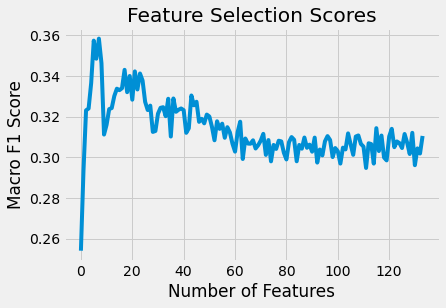

In [49]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [50]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(20)

,feature,rank
133,agesq,1
95,meaneduc,1
126,SQBage,1
115,qmobilephone,1
132,SQBmeaned,1
128,SQBedjefe,1
131,SQBdependency,1
130,SQBovercrowding,1
1,rooms,2
13,r4t2,3


In [54]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [56]:
# Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [59]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.35686 with std: 0.03723


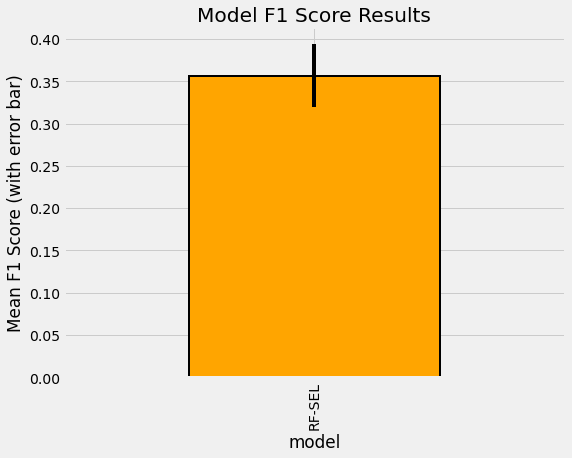

In [60]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)